# Regression Estimator

In [ ]:
import numpy as np
import pandas as pd

#vis lib
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# scale the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#sk lib import the regressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model._base import LinearRegression
from sklearn.linear_model._coordinate_descent import Lasso
from sklearn.linear_model._coordinate_descent import LinearModelCV

from sklearn.model_selection import cross_val_score

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm

ran_seed = 42

## Prepare Data
* Perform EDA
* Handle Missing Data (Remove or Impute)
* Identify Target Data
* Scale the Data
* Encode any Text Data (Categorical Data)

In [2]:
data = pd.read_csv('./penguins_size_clean.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [3]:
data.shape

(333, 7)

In [4]:
data.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [5]:
data.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [6]:
data.columns = ['species', 'island', 'bill_length', 'bill_depth', 'flipper_length', 'body_mass', 'sex']

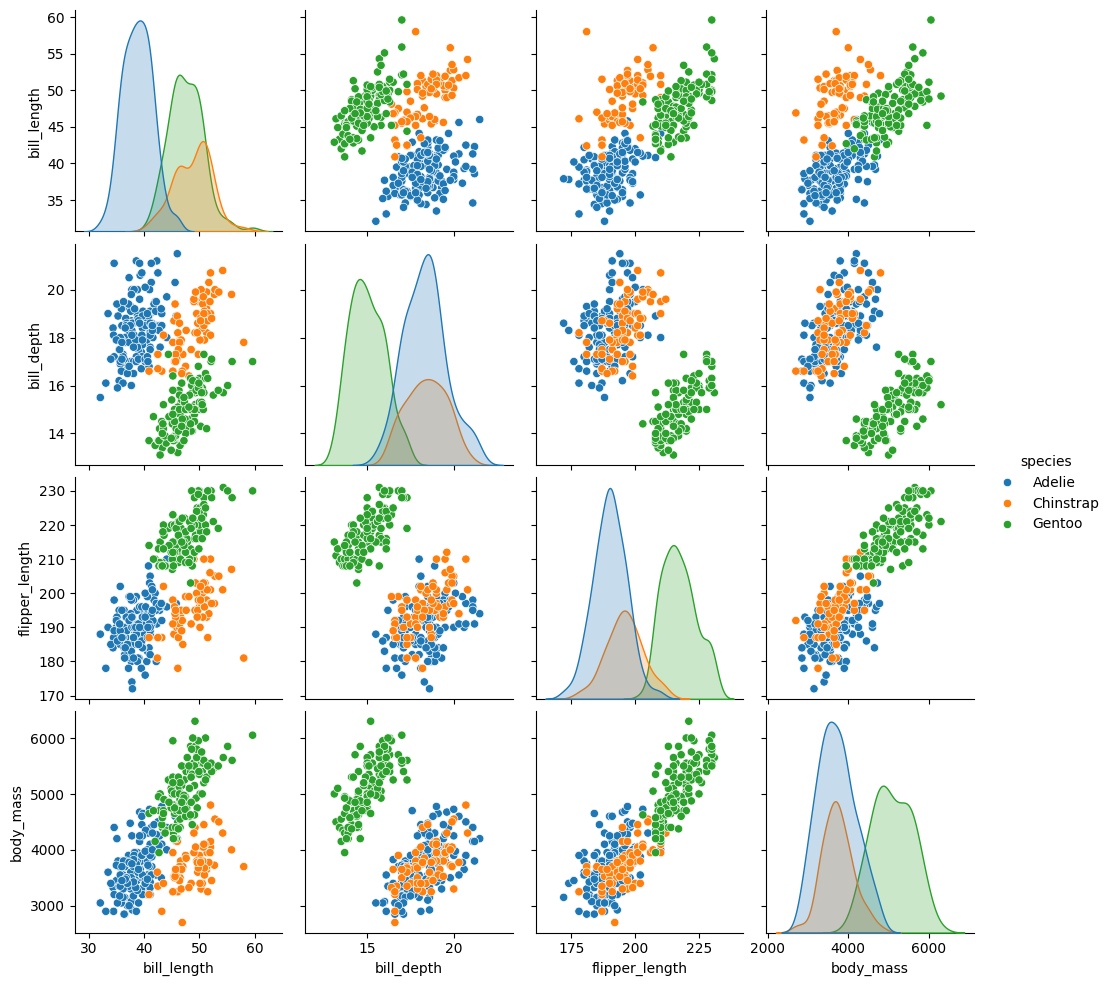

In [7]:
sns.pairplot(data, diag_kind='kde', hue='species');

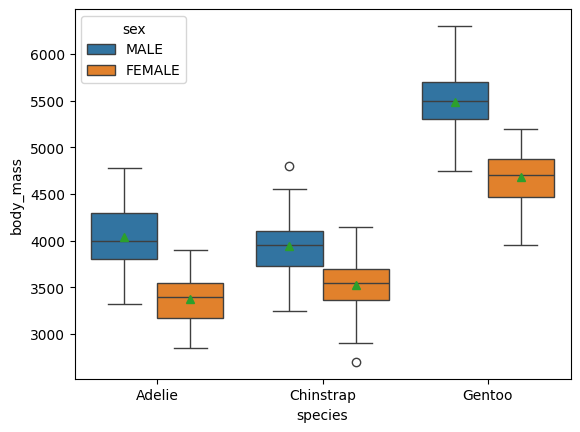

In [8]:
sns.boxplot(data=data, x='species', y='body_mass', hue='sex', showmeans=True);

### Handle Missing Data

In [9]:
# No missing data in the dataset

In [10]:
df = data.copy()
df.shape

(333, 7)

In [11]:
y_temp = df['body_mass']

In [12]:
X_tmp = df.drop('body_mass', axis=1)
X_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         333 non-null    object 
 1   island          333 non-null    object 
 2   bill_length     333 non-null    float64
 3   bill_depth      333 non-null    float64
 4   flipper_length  333 non-null    float64
 5   sex             333 non-null    object 
dtypes: float64(3), object(3)
memory usage: 15.7+ KB


### Scale the Data

In [13]:
# prep data for scaling and encoding
X_tmp_text = X_tmp.select_dtypes(include = ['object'])
X_tmp_numeric = X_tmp.select_dtypes(exclude = ['object'])

In [14]:
# preprocess the data - create scaler...
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(X_tmp_numeric)
scaled_numeric

array([[-8.96041890e-01,  7.80732104e-01, -1.42675157e+00],
       [-8.22787867e-01,  1.19583967e-01, -1.06947358e+00],
       [-6.76279821e-01,  4.24729261e-01, -4.26373194e-01],
       [-1.33556603e+00,  1.08587740e+00, -5.69284390e-01],
       [-8.59414878e-01,  1.74702554e+00, -7.83651184e-01],
       [-9.32668901e-01,  3.23014163e-01, -1.42675157e+00],
       [-8.77728384e-01,  1.23845005e+00, -4.26373194e-01],
       [-5.29771775e-01,  2.21299065e-01, -1.35529597e+00],
       [-9.87609419e-01,  2.05217083e+00, -7.12195586e-01],
       [-1.72014965e+00,  2.00131328e+00, -2.12006399e-01],
       [-1.35387953e+00,  3.23014163e-01, -1.14092917e+00],
       [-9.69295913e-01,  9.33304752e-01, -4.26373194e-01],
       [-2.73382694e-01,  1.79788309e+00, -2.83461997e-01],
       [-1.75677666e+00,  6.28159457e-01, -1.21238477e+00],
       [ 3.67590007e-01,  2.20474348e+00, -4.97828792e-01],
       [-1.13411746e+00,  5.77301908e-01, -1.92694075e+00],
       [-1.15243097e+00,  7.80732104e-01

In [15]:
df_scaled_numeric = pd.DataFrame(scaled_numeric)
df_scaled_numeric.columns = X_tmp_numeric.columns
df_scaled_numeric

,bill_length,bill_depth,flipper_length
0,-0.896042,0.780732,-1.426752
1,-0.822788,0.119584,-1.069474
2,-0.676280,0.424729,-0.426373
3,-1.335566,1.085877,-0.569284
4,-0.859415,1.747026,-0.783651
...,...,...,...
328,0.587352,-1.762145,0.931283
329,0.514098,-1.457000,1.002739
330,1.173384,-0.744994,1.502928
331,0.221082,-1.202712,0.788372


### Encode the Data

In [16]:
# encode any text features that will be features
df_scaled_text = pd.get_dummies(X_tmp_text, drop_first=True)
df_scaled_text

,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_MALE
0,False,False,False,True,True
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,True
...,...,...,...,...,...
328,False,True,False,False,False
329,False,True,False,False,False
330,False,True,False,False,True
331,False,True,False,False,False


In [17]:
df_final = pd.concat([df_scaled_text, df_scaled_numeric], axis=1)
df_final

,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_MALE,bill_length,bill_depth,flipper_length
0,False,False,False,True,True,-0.896042,0.780732,-1.426752
1,False,False,False,True,False,-0.822788,0.119584,-1.069474
2,False,False,False,True,False,-0.676280,0.424729,-0.426373
3,False,False,False,True,False,-1.335566,1.085877,-0.569284
4,False,False,False,True,True,-0.859415,1.747026,-0.783651
...,...,...,...,...,...,...,...,...
328,False,True,False,False,False,0.587352,-1.762145,0.931283
329,False,True,False,False,False,0.514098,-1.457000,1.002739
330,False,True,False,False,True,1.173384,-0.744994,1.502928
331,False,True,False,False,False,0.221082,-1.202712,0.788372


## Select the Target Data and Independent Variables (i.e. X)
* Create an array of the target data
* Select the features to be used for prediction
* Create a 2d array (or DF) of the selected features for the X Matrix

In [18]:
y = y_temp

In [19]:
X = df_final
X.head()

,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_MALE,bill_length,bill_depth,flipper_length
0,False,False,False,True,True,-0.896042,0.780732,-1.426752
1,False,False,False,True,False,-0.822788,0.119584,-1.069474
2,False,False,False,True,False,-0.676280,0.424729,-0.426373
3,False,False,False,True,False,-1.335566,1.085877,-0.569284
4,False,False,False,True,True,-0.859415,1.747026,-0.783651


## Prepare the Model

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=ran_seed)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((223, 8), (110, 8), (223,), (110,))

## Create the Model

In [22]:
lr_reg = LinearRegression(n_jobs=-1)
lr_reg

LinearRegression(n_jobs=-1)

In [23]:
lr_reg.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [24]:
preds_train = lr_reg.predict(X_train)

In [25]:
lr_reg.score(X_train, y_train)

0.8681895232024185

In [26]:
df_train = X_train
df_train['prediction'], df_train['actual'] = preds_train, y_train
df_train

,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_MALE,bill_length,bill_depth,flipper_length,prediction,actual
39,False,False,True,False,False,-1.280626,-0.134704,-1.140929,3308.259439,3000.0
310,False,True,False,False,False,0.807114,-1.406143,0.145272,4613.143312,4625.0
104,False,False,False,False,False,-1.079177,-0.338134,-0.212006,3492.761510,3825.0
155,True,False,True,False,True,1.338206,1.391023,-0.212006,4111.156594,3700.0
193,True,False,True,False,True,0.916995,1.238450,0.788372,4296.853701,4300.0
...,...,...,...,...,...,...,...,...,...,...
188,True,False,True,False,True,1.264952,0.984162,-0.354918,4010.844231,3550.0
71,False,False,False,True,True,-1.243998,1.136735,-1.212385,3738.910792,3900.0
106,False,False,False,False,False,-0.786161,0.272157,-0.569284,3519.322067,3200.0
270,False,True,False,False,True,0.276022,-1.100997,1.360017,5276.639057,5000.0


### Run model against the test set

In [27]:
preds_test = lr_reg.predict(X_test)

In [28]:
lr_reg.score(X_test, y_test)

0.8854062877051314

In [29]:
X_test['Prediction'] = preds_test
X_test['Actual'] = y_test

In [30]:
X_test

,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_MALE,bill_length,bill_depth,flipper_length,Prediction,Actual
25,False,False,True,False,False,-0.822788,-0.236419,-1.641118,3212.513402,3250.0
309,False,True,False,False,False,0.532412,-1.304427,1.502928,4936.719574,4875.0
73,False,False,False,True,True,-0.346637,0.984162,-0.426373,3992.715707,4000.0
195,True,False,True,False,False,1.063503,0.068726,-0.212006,3526.715165,3675.0
57,False,False,False,False,True,-0.529772,0.526444,-0.640740,3931.135846,4050.0
...,...,...,...,...,...,...,...,...,...,...
10,False,False,False,True,False,-1.353880,0.323014,-1.140929,3260.194369,3700.0
225,False,True,False,False,True,0.916995,-0.541564,1.074194,5345.379436,5550.0
227,False,True,False,False,True,0.807114,-1.304427,0.859828,5173.002033,5850.0
81,False,False,True,False,False,-1.298939,0.729875,-0.855107,3501.078550,3500.0


In [31]:
rmse = np.sqrt(mean_squared_error(y_test, preds_test))
r2_score(y_test, preds_test), mean_squared_error(y_test, preds_test), rmse, mean_absolute_error(y_test, preds_test)

(0.8854062877051314, 71024.2831776597, 266.5038145649321, 208.0089703931956)

In [32]:
np.median(y_temp), np.mean(y_temp), np.std(y_temp), np.min(y_temp), np.max(y_temp), np.max(y_temp) - np.min(y_temp)

(4050.0, 4207.057057057057, 804.005860159563, 2700.0, 6300.0, 3600.0)

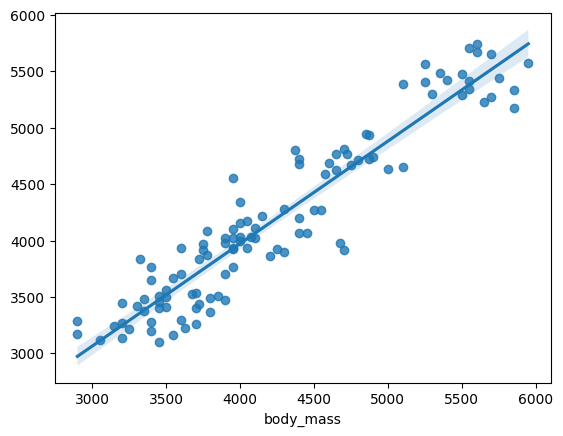

In [33]:
sns.regplot(x=y_test, y=preds_test);

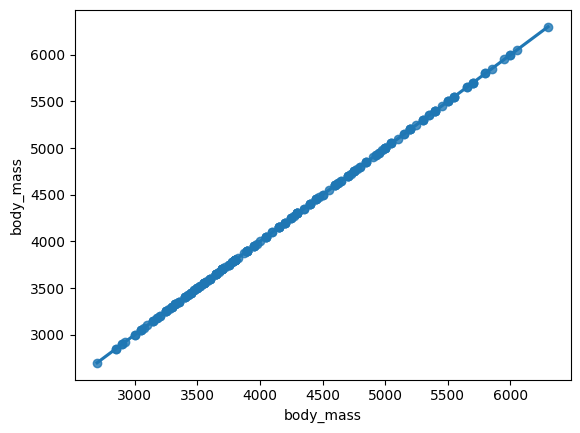

In [34]:
sns.regplot(x=y_train, y=y_train);

<Axes: xlabel='body_mass'>

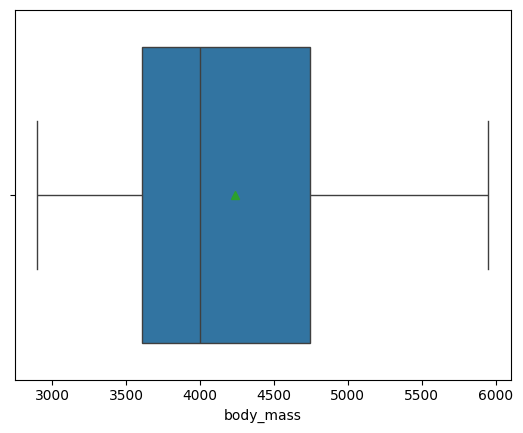

In [35]:
sns.boxplot(x=y_test, showmeans=True)

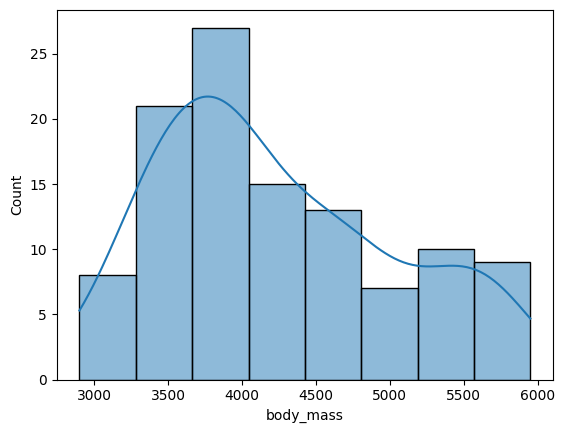

In [36]:
sns.histplot(x=y_test, kde=True);

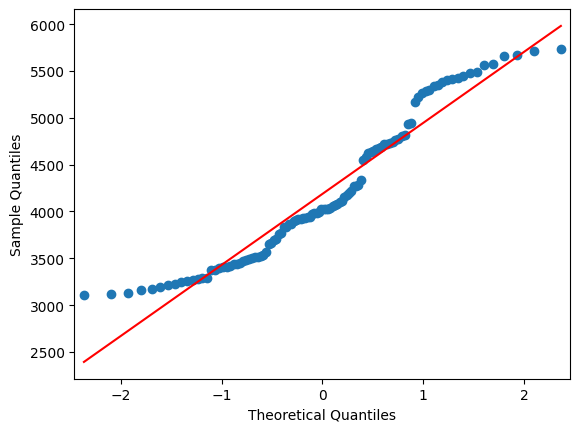

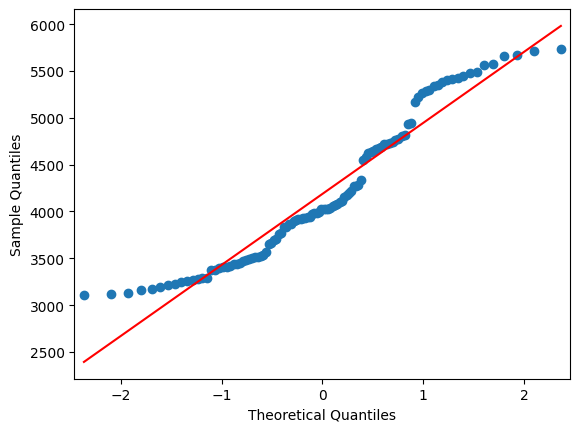

In [37]:
sm.qqplot(preds_test, line='s')

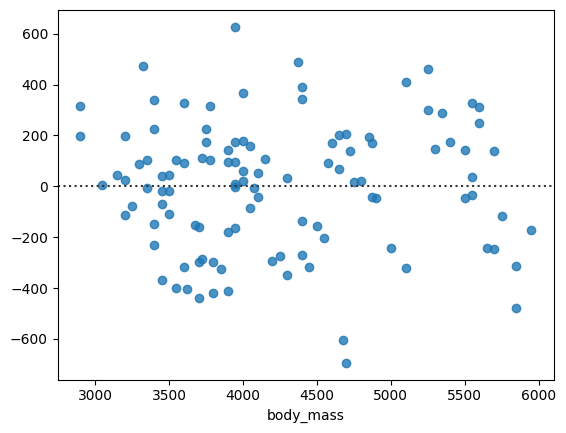

In [38]:
sns.residplot(x=y_test, y=preds_test);

#### Crossvalidation on the LR Model

In [39]:
# Perform k-fold cross validation
scores = cross_val_score(lr_reg, X_test, y_test, cv=20, scoring='r2')
print("Cross-validation scores: ", scores)
print("Average cross-validation score: ", scores.mean())

Cross-validation scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average cross-validation score:  1.0


In [41]:
# Perform k-fold cross validation
scores = cross_val_score(lr_reg, X_test, y_test, cv=10, scoring='neg_mean_squared_error')
print("Cross-validation scores: ", scores)
print("Average cross-validation score: ", scores.mean())

Cross-validation scores:  [-2.06795153e-25 -4.69988984e-25 -3.75991188e-25 -1.50396475e-25
 -3.19592509e-25 -2.25594713e-25 -1.87995594e-25 -7.14383256e-25
 -2.06795153e-25 -3.19592509e-25]
Average cross-validation score:  -3.1771255345786745e-25


In [42]:
print("Cross-validation MSE: ", np.sqrt(np.abs(scores)))
print("Average cross-validation MSE: ", np.mean(np.sqrt(np.abs(scores))))

Cross-validation MSE:  [4.54747351e-13 6.85557426e-13 6.13181203e-13 3.87809844e-13
 5.65325136e-13 4.74968117e-13 4.33584587e-13 8.45211959e-13
 4.54747351e-13 5.65325136e-13]
Average cross-validation MSE:  5.48045810993196e-13
